# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [4]:
# Rename columns lovercase 
df.columns = df.columns.str.lower()

In [5]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
st slope               0
target                 0
dtype: int64

In [6]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,st slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
df.corr()['target'].sort_values(ascending=False)

target                 1.000000
st slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
resting ecg            0.073059
cholesterol           -0.198366
max heart rate        -0.413278
Name: target, dtype: float64

## Visualizing the Data

### Heatmap

<Axes: >

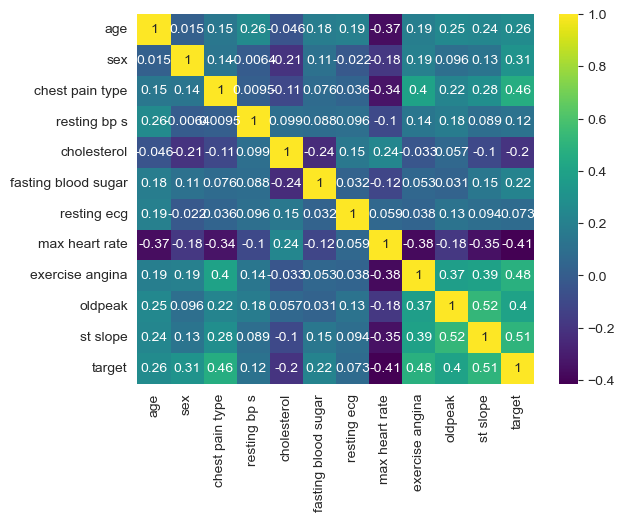

In [8]:

sns.heatmap(df.corr(),annot = True,cmap = 'viridis')


### Pairplot

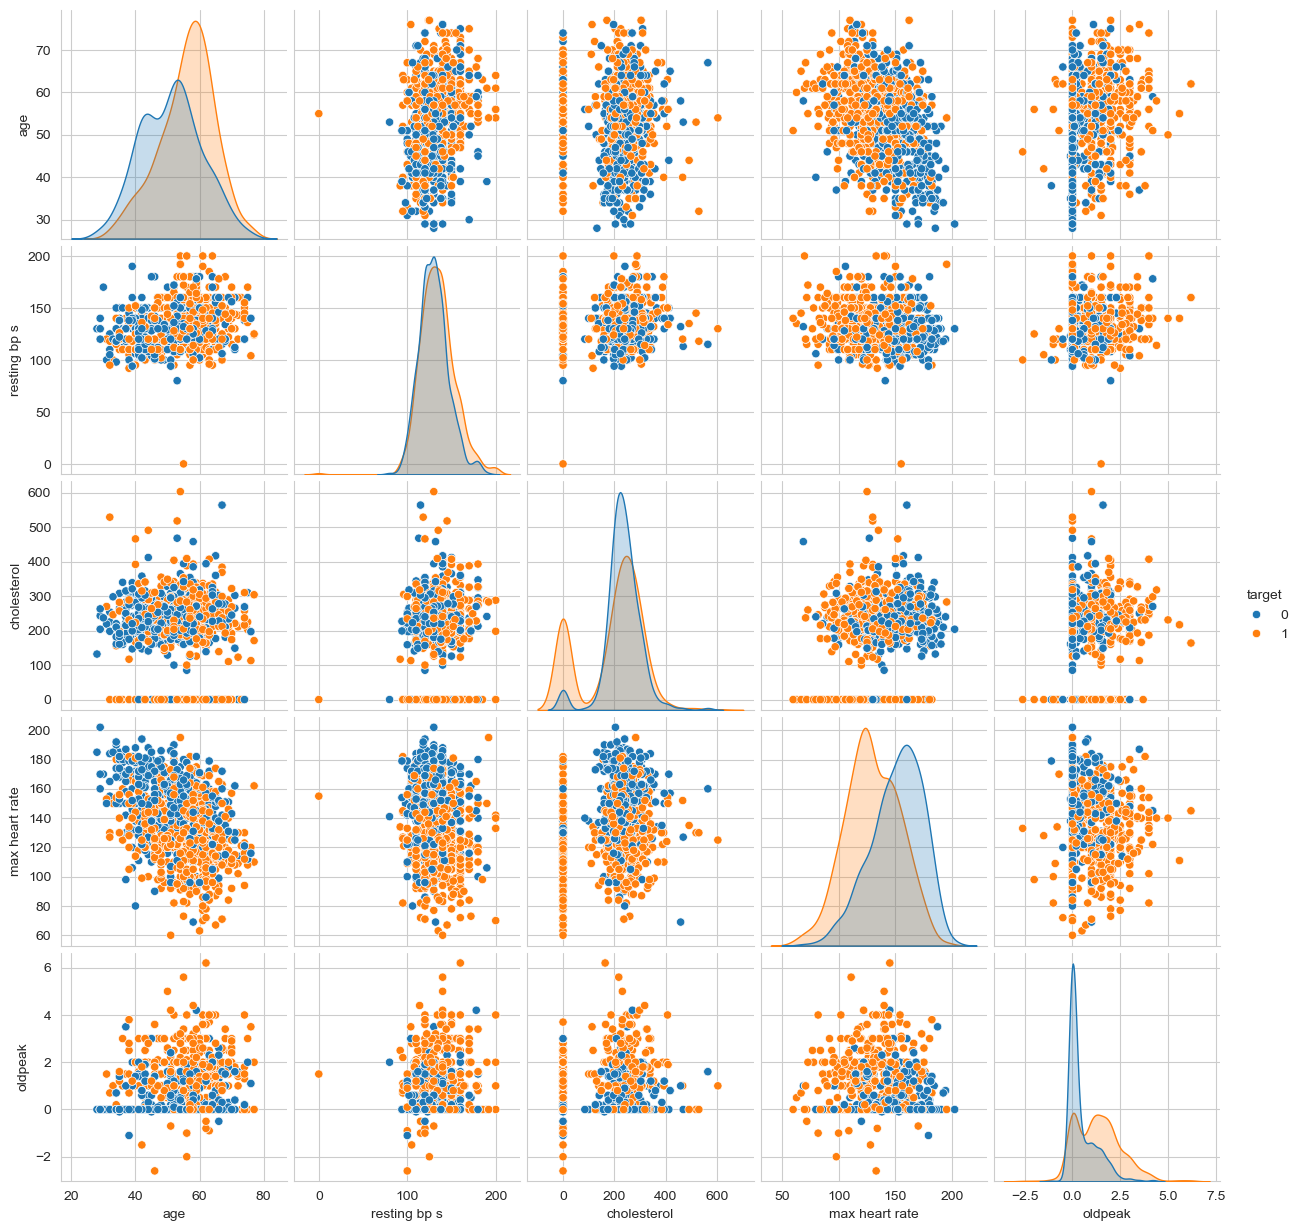

In [9]:
sns.pairplot(df.drop(['chest pain type','fasting blood sugar','resting ecg','exercise angina','st slope', 'sex'],axis=1),hue='target')

In [10]:
#g = sns.PairGrid(df)
#g.map_upper(sns.histplot)
#g.map_lower(sns.kdeplot, fill=True)
#g.map_diag(sns.histplot, kde=True)
# not necessary to plot all the data

### Target Distribution

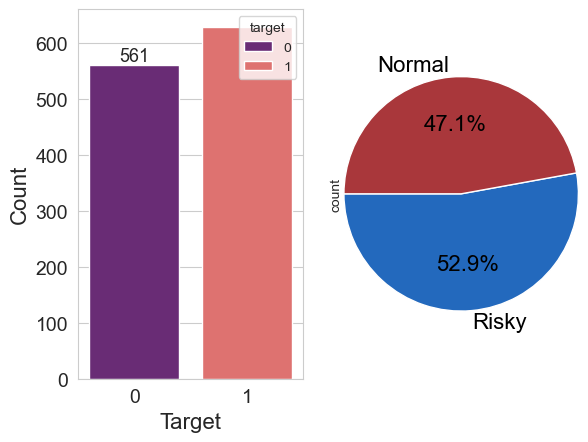

In [11]:

plt.subplot(1,2,1)
ax = sns.countplot(x = 'target',data = df,palette = 'magma' , hue='target')
ax.bar_label(ax.containers[0],size = 13)
plt.xticks(size = 14)
plt.xlabel('Target',size = 16)
plt.yticks(size = 14)
plt.ylabel('Count',size = 16)

plt.subplot(1,2,2)
df['target'].value_counts().plot.pie(autopct = '%.1f%%',radius = 1.3,textprops = {'fontsize':16,'color':'black'},
                                     labels = ['Risky','Normal'],cmap = 'vlag',startangle = 180)

plt.show()

### Categorical Values

In [12]:
def plot_count(feature):
    ax = sns.countplot(x = feature,data = df,palette = 'inferno' , hue='target' )
    ax.bar_label(ax.containers[0],size = 13)
    ax.bar_label(ax.containers[1],size = 13)
    plt.xlabel(feature.title(),size = 16)
    plt.xticks(size = 14)
    plt.ylabel('Count',size = 16)
    plt.yticks(size = 14)

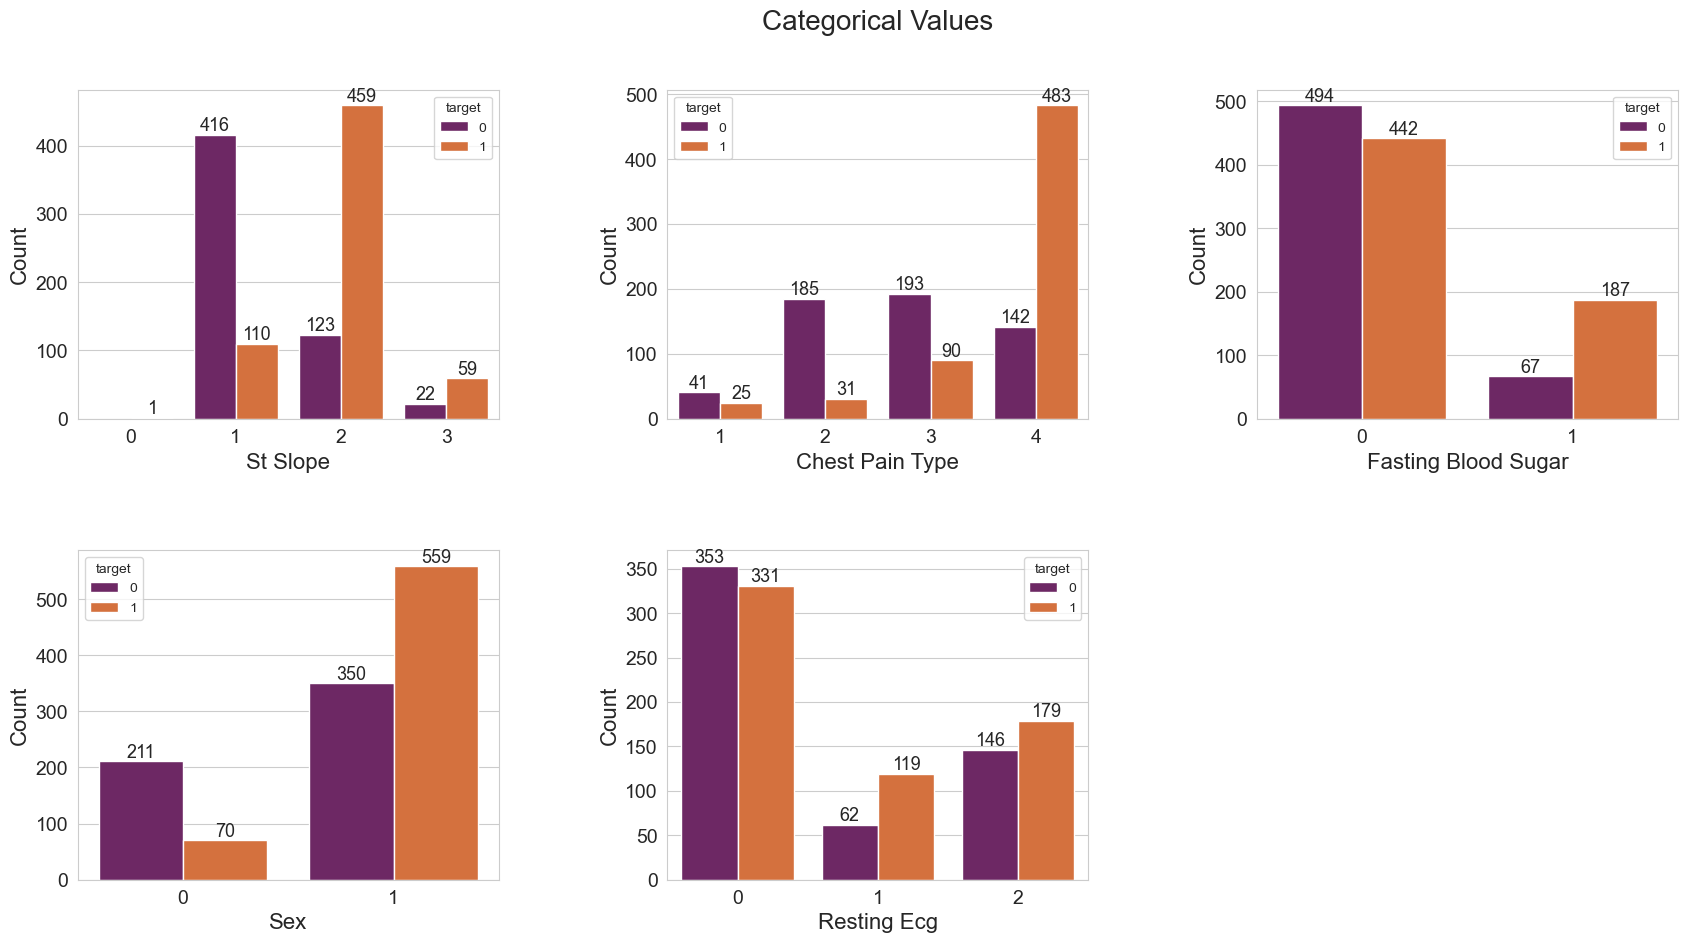

In [13]:
plt.figure(figsize = (20,10))


plt.subplot(2,3,1)
plot_count('st slope')

plt.subplot(2,3,2)
plot_count('chest pain type')

plt.subplot(2,3,3)
plot_count('fasting blood sugar')

plt.subplot(2,3,4)
plot_count('sex')

plt.subplot(2,3,5)
plot_count('resting ecg')

plt.suptitle('Categorical Values',size = 20)
plt.subplots_adjust(left = 0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

### Max Heart Rate

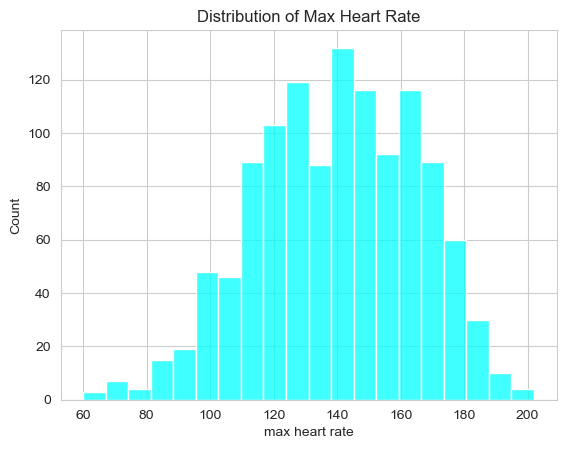

In [14]:

sns.histplot(x = 'max heart rate',data = df ,color='cyan')
plt.title('Distribution of Max Heart Rate',)
plt.show()

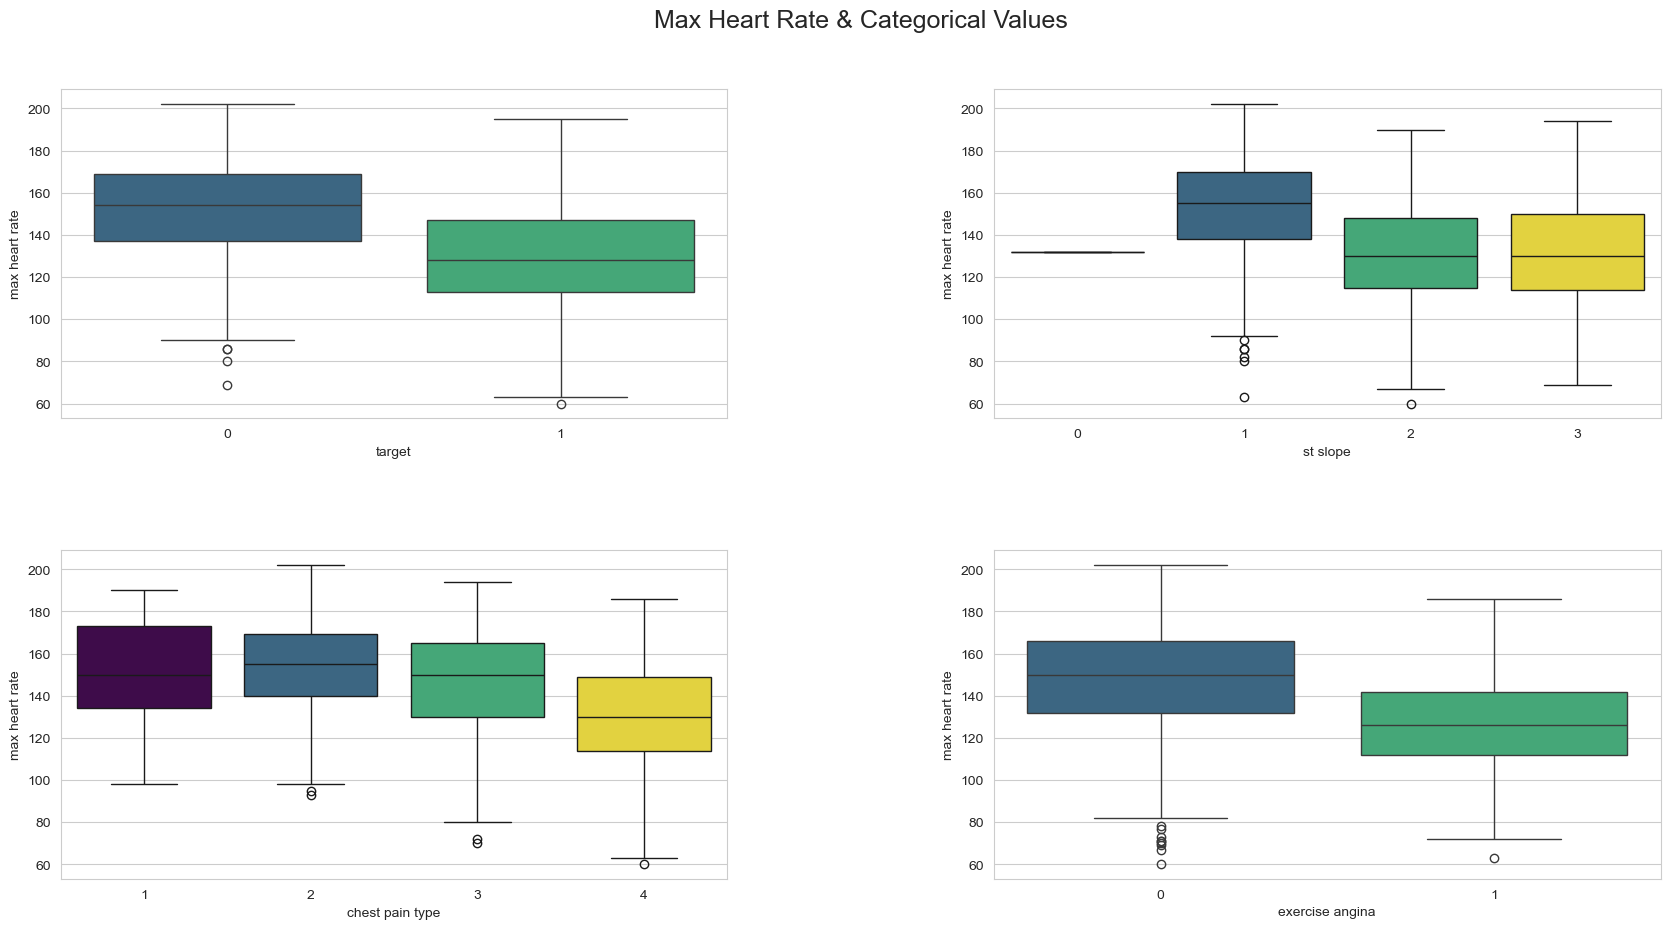

In [15]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='max heart rate', hue='target', data=df, palette='viridis', dodge=False)
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 2)
sns.boxplot(x='st slope', y='max heart rate', hue='st slope', data=df, palette='viridis', dodge=False)
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 3)
sns.boxplot(x='chest pain type', y='max heart rate', hue='chest pain type', data=df, palette='viridis', dodge=False)
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 4)
sns.boxplot(x='exercise angina', y='max heart rate', hue='exercise angina', data=df, palette='viridis', dodge=False)
plt.legend([],[], frameon=False)

plt.suptitle('Max Heart Rate & Categorical Values', size=18)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [16]:
def plot_box_heart_vs_age(data,title):
    sns.boxplot(x = 'age',y = 'max heart rate',hue = 'target',data = data,palette = 'magma')
    plt.ylabel('Max Heart Rate',size = 16)
    plt.yticks(size = 14)
    plt.xlabel('Age',size = 16)
    plt.xticks(size = 14)
    plt.title(title,size = 18)

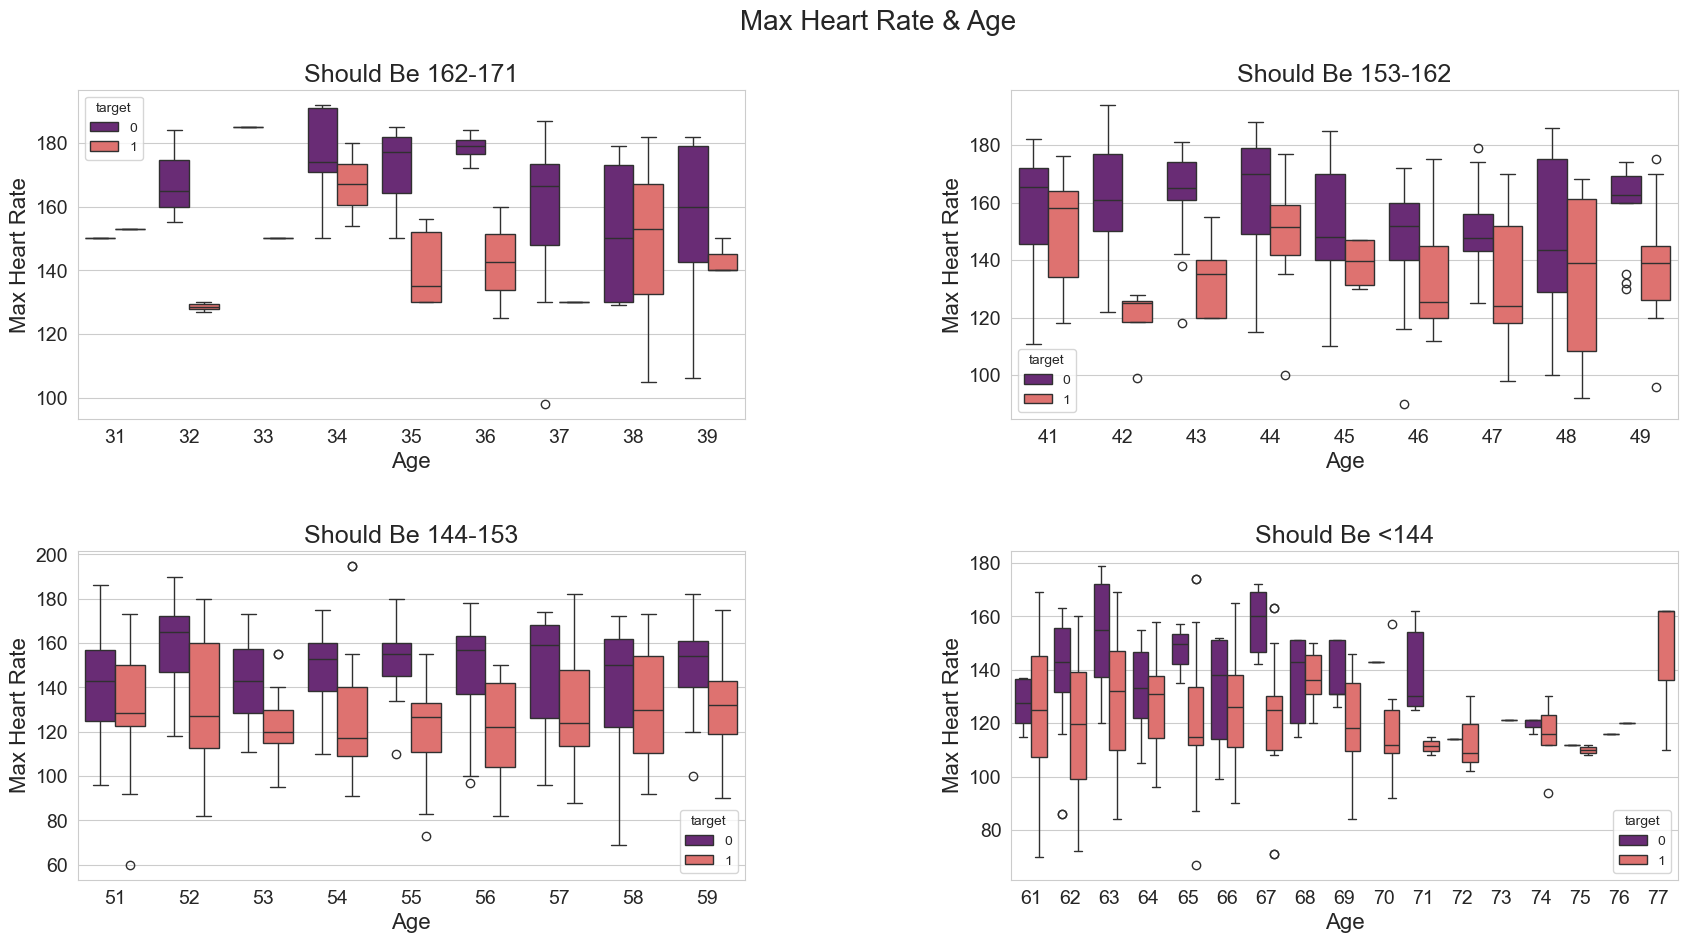

In [17]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plot_box_heart_vs_age(df[(df.age>30) & (df.age<40)],'Should Be 162-171')

plt.subplot(2,2,2)
plot_box_heart_vs_age(df[(df.age>40) & (df.age<50)],'Should Be 153-162')

plt.subplot(2,2,3)
plot_box_heart_vs_age(df[(df.age>50) & (df.age<60)],'Should Be 144-153')

plt.subplot(2,2,4)
plot_box_heart_vs_age(df[df.age>60],'Should Be <144')

plt.suptitle('Max Heart Rate & Age',size = 20)
plt.subplots_adjust(left = 0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

### Cholesterol

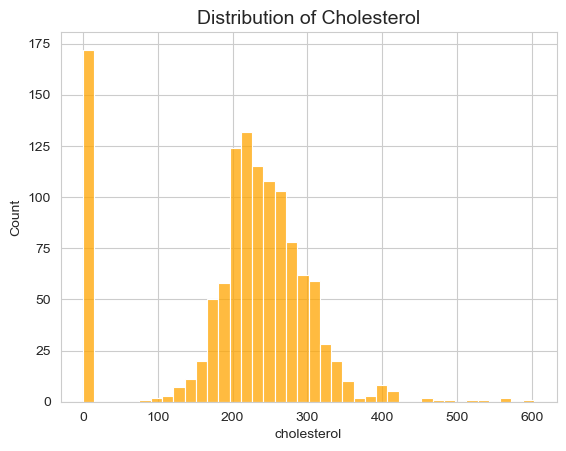

In [18]:

sns.histplot(x = 'cholesterol',data = df ,color='orange')
plt.title('Distribution of Cholesterol',size = 14)
plt.show()

In [19]:
def plot_pie_target(data,title):
    data.plot.pie(autopct = '%.1f%%',radius = 1.3,
                  textprops = {'fontsize':16,'color':'black'},labels = ['Normal Heart','Risky Heart'],
                  cmap = 'vlag',startangle = 60)
    plt.title(title,size = 18,y = 1.1)

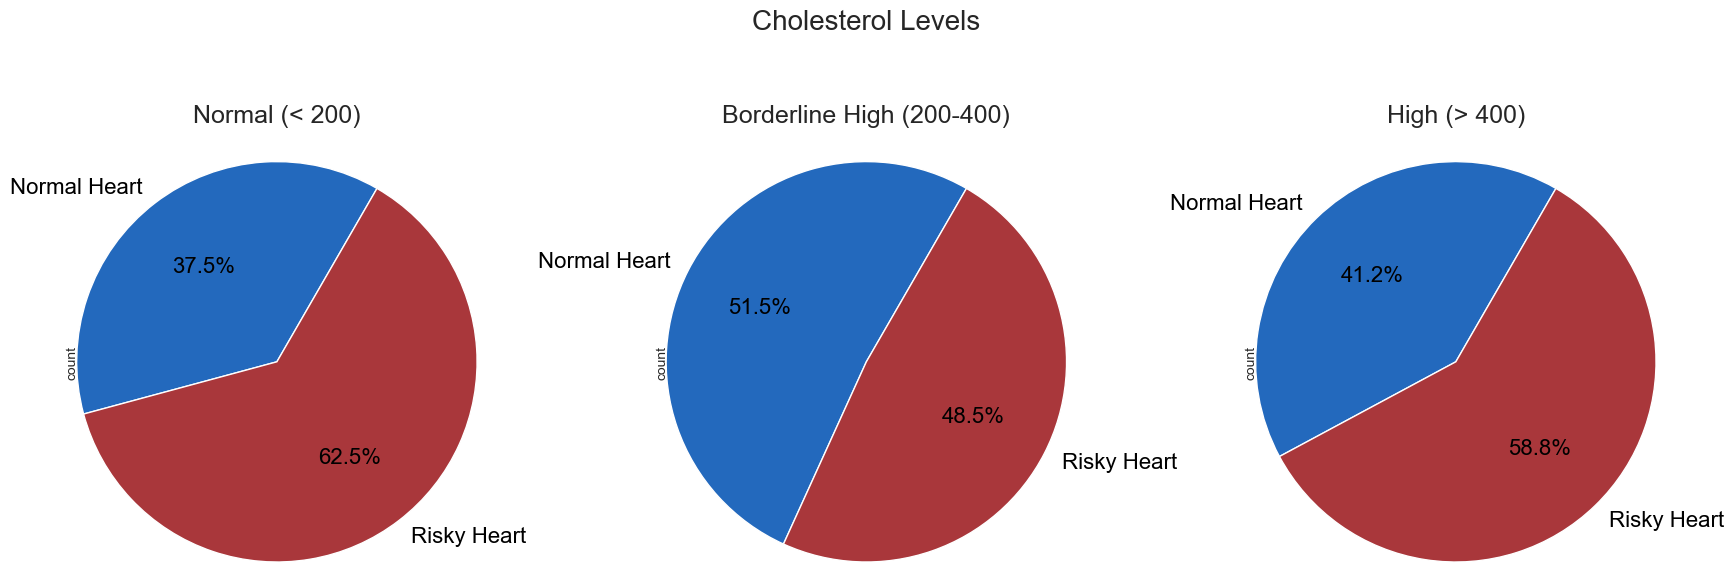

In [20]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plot_pie_target(df[df.cholesterol<200]['target'].value_counts().sort_values(),'Normal (< 200)')

plt.subplot(1,3,2)
plot_pie_target(df[(df.cholesterol>200) & (df.cholesterol<400)]['target'].value_counts().sort_values(ascending = False),'Borderline High (200-400)')

plt.subplot(1,3,3)
plot_pie_target(df[df.cholesterol>400]['target'].value_counts().sort_values(),'High (> 400)')

plt.suptitle('Cholesterol Levels',size = 20,y = 1.2)

plt.subplots_adjust(left = 0.1, right=0.9,wspace=0.4,hspace=0.4)
plt.show()

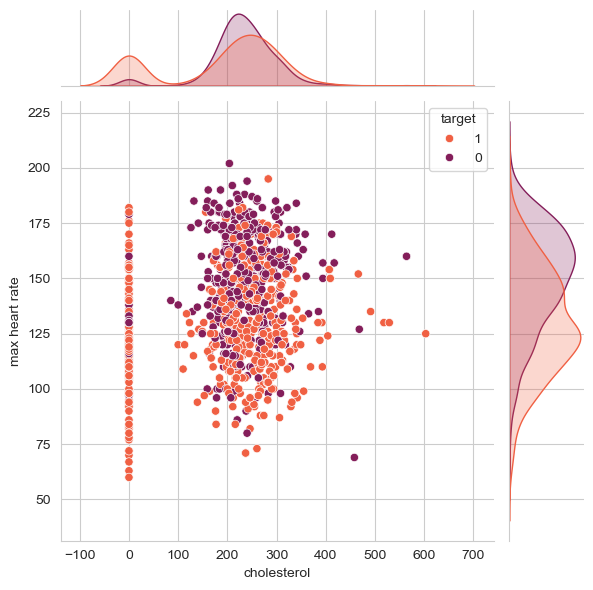

In [21]:
sns.jointplot(x = 'cholesterol',y = 'max heart rate',hue = 'target',hue_order=[1,0],data = df,palette = 'rocket_r')
plt.show()

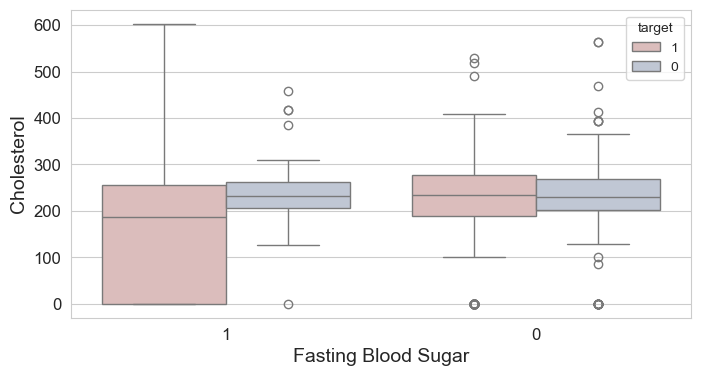

In [22]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'fasting blood sugar',y = 'cholesterol',order=[1,0],hue = 'target',hue_order=[1,0],data = df,palette = 'vlag_r')
plt.xlabel('Fasting Blood Sugar',size = 14)
plt.xticks(size = 12)
plt.ylabel('Cholesterol',size = 14)
plt.yticks(size = 12)
plt.show()

### Age

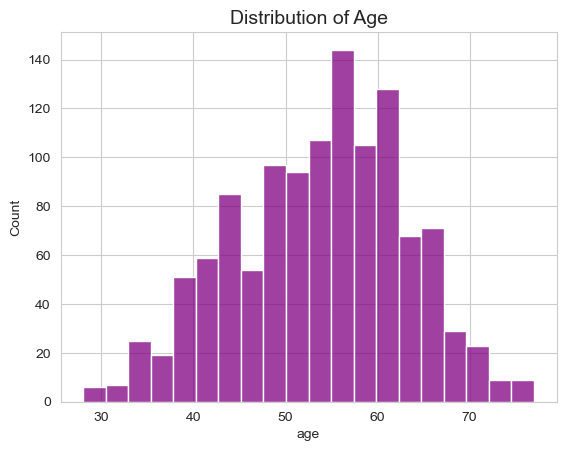

In [23]:
sns.histplot(x = 'age',data = df , color = 'purple')
plt.title('Distribution of Age',size = 14)
plt.show()

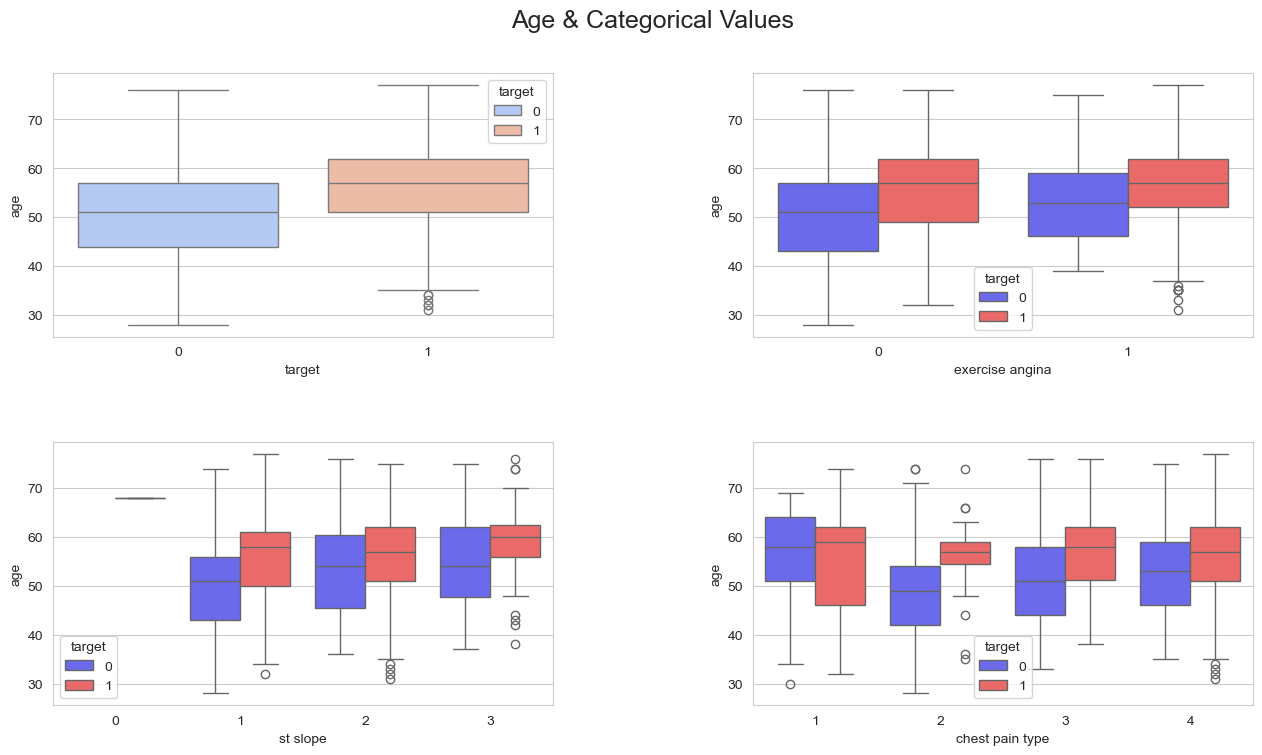

In [24]:
plt.figure(figsize = (15,8))

plt.subplot(2,2,1)
sns.boxplot(x = 'target',y = 'age',data = df,palette = 'coolwarm', dodge = False , hue = 'target')

plt.subplot(2,2,2)
sns.boxplot(x = 'exercise angina',y = 'age',hue = 'target',data = df,palette = 'seismic')

plt.subplot(2,2,3)
sns.boxplot(x = 'st slope',y = 'age',hue = 'target',data = df,palette = 'seismic')

plt.subplot(2,2,4)
sns.boxplot(x = 'chest pain type',y = 'age',hue = 'target',data = df,palette = 'seismic')

plt.suptitle('Age & Categorical Values',size = 18)
plt.subplots_adjust(left = 0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

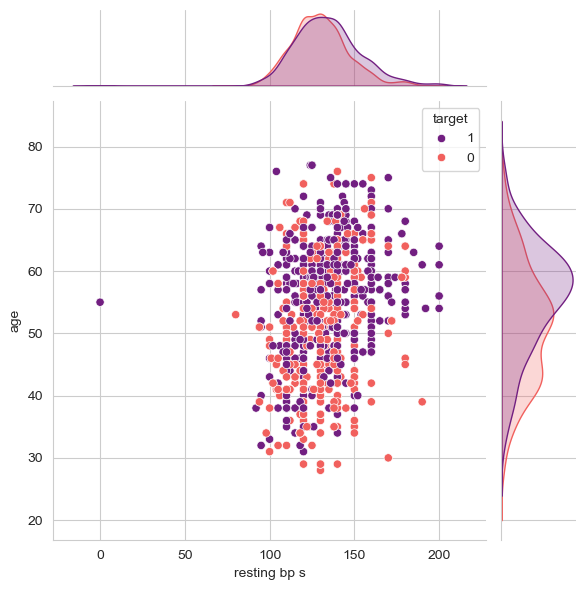

In [25]:
sns.jointplot(y = 'age',x = 'resting bp s',data = df,hue = 'target',hue_order = [1,0],palette = 'magma')

### Remove some data

In [26]:
df = df[df['st slope']!=0] # 1 person

## Data PreProcessing

In [27]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Importing Libraries

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV

In [32]:
def calculate_result(classifier,algorithmName):

    global df_result,index

    y_pred = classifier.predict(X_test)

    acc = round(accuracy_score(y_test,y_pred),3)
    precision = round(precision_score(y_test,y_pred),3)
    recall = round(recall_score(y_test,y_pred),3)

    cvs = cross_val_score(estimator=classifier,X = X_train, y = y_train,cv = 10)
    cvs_mean = round(cvs.mean(),3)
    cvs_std = round(cvs.std() *100,3)

    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

    d = {'Algorithm':algorithmName,'Accuracy':acc,'Precision':precision,'Recall':recall,'cvs mean':cvs_mean,
         'cvs std (%)':cvs_std,'TP':tp,'TN':tn,'FP':fp,'FN':fn}

    new_df = pd.DataFrame(data = d,index = [index])
    df_result = pd.concat([df_result,new_df])
    index += 1

In [33]:
def grid_search(parameters,classifier,algorithmName):

    # add the parameters to the grid_search
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=parameters,
        scoring='accuracy',
        cv=10,
        n_jobs = -1 #opsiyonel
    )

    # fit the gird_search
    grid_search.fit(X_train,y_train)

    # calculate scores
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    # print scores
    print(algorithmName.center(50,'*'))
    print(f'Best Parameters: {best_parameters}\n\n')    

In [34]:
def random_forest():
    classifier = RandomForestClassifier(n_estimators=100,criterion = 'entropy',random_state=10).fit(X_train,y_train)

    parameters = [{'n_estimators':[10,50,100],'criterion':['gini','entropy'],'random_state':[0,10,50,100]}]
    grid_search(parameters,classifier,'Random Forest Classifier')

    return classifier

In [35]:
def decision_tree():
    classifier = DecisionTreeClassifier(criterion  ='entropy',random_state=0).fit(X_train,y_train)

    parameters = [{'criterion':['gini','entropy'],'random_state':[0,10,50,100]}]
    grid_search(parameters,classifier,'Decision Tree Classifier')

    return classifier

In [36]:
def knn():
    classifier = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)

    parameters = [{'n_neighbors':[3,5,7,9,15]}]
    grid_search(parameters,classifier,'KNN Classifier')

    return classifier

In [37]:
def naive_bayes():
    classifier = GaussianNB().fit(X_train,y_train)
    return classifier

In [38]:
def logistic_reg():
    classifier = LogisticRegression(C=2.0,random_state=0).fit(X_train,y_train)

    parameters = [{'C':[1.0,2.0,3.0,4.0,5.0],'random_state':[0,10,50,100]}]
    grid_search(parameters,classifier,'Logistic Regression')

    return classifier

In [39]:
def xgboost():
    classifier = XGBClassifier().fit(X_train,y_train)
    return classifier

In [40]:
df_result = pd.DataFrame()
index = 1
classifiers = {'random_forest':random_forest(),'decision_tree':decision_tree(),'knn':knn(),
               'naive_bayes':naive_bayes(),'log_reg':logistic_reg(),'xgboost':xgboost()}

for c in classifiers:
    calculate_result(classifiers[c],c)

*************Random Forest Classifier*************
Best Parameters: {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 10}


*************Decision Tree Classifier*************
Best Parameters: {'criterion': 'entropy', 'random_state': 0}


******************KNN Classifier******************
Best Parameters: {'n_neighbors': 7}


***************Logistic Regression****************
Best Parameters: {'C': 2.0, 'random_state': 0}




In [41]:
df_result.sort_values(by = 'Accuracy',ascending=False)

,Algorithm,Accuracy,Precision,Recall,cvs mean,cvs std (%),TP,TN,FP,FN
1,random_forest,0.936,0.925,0.964,0.916,4.543,160,119,13,6
6,xgboost,0.919,0.928,0.928,0.911,3.909,154,120,12,12
2,decision_tree,0.886,0.884,0.916,0.874,5.267,152,112,20,14
3,knn,0.872,0.890,0.880,0.846,4.792,146,114,18,20
4,naive_bayes,0.872,0.900,0.867,0.826,5.125,144,116,16,22
5,log_reg,0.856,0.873,0.867,0.832,4.965,144,111,21,22


In [42]:
# import pickle
# try:
#     with open('your_file_name', 'wb') as file:  
#         pickle.dump(classifiers['enter_algorithm_name'], file)
#     print('Model Saved')
# except:
#     print('Invalid Algorithm Name!')

In [43]:
# import pickle
# try:
#     with open('your_file_name', 'rb') as file:  
#         my_model = pickle.load(file)
#     print('Model Loaded')
# except:
#     print('Invalid Filename!')